In [ ]:
# 🎯 Objective
# Compare all models + predict future house price.

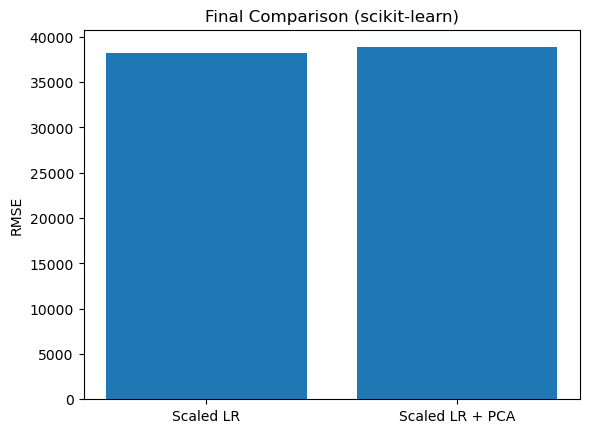

🏠 Future House Prediction
Configuration: 2000 sqft, Quality 7, 2 Garage, Built 2015
Estimated Sale Price: $232,761


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error

# Load data
df = pd.read_csv("train.csv")

FEATURES = [
    "GrLivArea",
    "OverallQual",
    "TotalBsmtSF",
    "GarageCars",
    "YearBuilt",
    "SalePrice"
]

df = df[FEATURES]
df["TotalBsmtSF"] = df["TotalBsmtSF"].fillna(0)
df["GarageCars"] = df["GarageCars"].fillna(0)

X = df.drop("SalePrice", axis=1).values
y = df["SalePrice"].values

# sklearn models
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

lr = LinearRegression()
lr.fit(X_scaled, y)
y_pred_sk = lr.predict(X_scaled)

pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

lr_pca = LinearRegression()
lr_pca.fit(X_pca, y)
y_pred_pca = lr_pca.predict(X_pca)

# RMSE comparison
rmse_scaled = np.sqrt(mean_squared_error(y, y_pred_sk))
rmse_pca = np.sqrt(mean_squared_error(y, y_pred_pca))

# print("RMSE (Scaled):", np.sqrt(mean_squared_error(y, y_pred_sk)))
# print("RMSE (Scaled + PCA):", np.sqrt(mean_squared_error(y, y_pred_pca)))

plt.bar(["Scaled LR", "Scaled LR + PCA"], [rmse_scaled, rmse_pca])
plt.ylabel("RMSE")
plt.title("Final Comparison (scikit-learn)")
plt.show()

# Future prediction
future_house = np.array([[2000, 7, 800, 2, 2015]])
future_scaled = scaler.transform(future_house)
pred_price = lr.predict(future_scaled)

# print("Future House Predicted Price:", int(pred_price[0]))
print("🏠 Future House Prediction")
print("Configuration: 2000 sqft, Quality 7, 2 Garage, Built 2015")
print(f"Estimated Sale Price: ${int(pred_price[0]):,}")
